# Mandelbrot Set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is the set of complex numbers $c$  for which the function $ f_{c}(z)=z^{2}+c$ does not diverge to infinity when iterated from $z=0$, i.e., for which the sequence $f_{c}(0)$, $ f_{c}(f_{c}(0))$, $f_{c}(f_{c}(0))$, etc., remains bounded in absolute value. 
The Mandelbrot sequence is thus given by the following recursive formula:
$$
\left\{\begin{matrix}
z_0 &=& 0 \\
z_{n+1} &=& z^2_n + c
\end{matrix}\right.
$$
Informally, to identify complex numbers belonging to the Mandelbrot set, we must apply the above formula with a given complex value $c$. Such a number will remain constant for the whole process. The first element of the sequence is always equal to zero. The subsequent values are computed  squaring the previous element and adding the initial number $c$ in a feedback loop.
Note that the sequence is infinite, so there must be a set maximum number of iteration to grant halting.
If at a given step for a given $c$ the sequence diverges, i.e., it goes beyond a fixed *horizon*, the evaluation is also stopped.

In order to represent the Mandelbrot set we have to apply the above formula to all the points in a subset of the complex plane, and keep track of the number of iterations we can perform for each point before divergence.

> Conveniently, the Mandelbrot set fits in a circle with a radius of two on the complex plane. There is no need to explore further than that.

You are required to write a pure Python implementation of a function to evaluate the Mandelbrot set, using iteration, and a vectorized function using NumPy and its arrays. You then must evaluate and compare the performance of the two approaches.

You should also try to visualize the end result obtained via NumPy relying on `matplotlib` plotting functionalities.
You should obtain something similar to the following image.

<center><img src="mandelbrot.png" style="max-width:500px;"/></center>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

100%|██████████| 1000/1000 [00:12<00:00, 79.41it/s]


non vectorized approach computational time: 12.609323740005493
vectorized approach computational time: 2.378239393234253


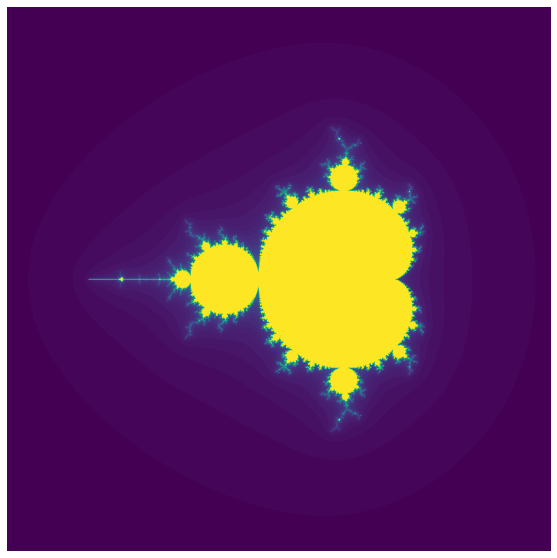

In [5]:
MAX_ITER=72
HORIZON=1e4
GRID_POINTS=int(1e3)
GRID_STEP=4/GRID_POINTS

def f(c):
    i = 0
    z = 0 + 0j
    while(i<MAX_ITER and abs(z)<HORIZON):
        z = z**2 + c
        i += 1
    return i

def f_vec(c):
    i = np.zeros((GRID_POINTS,GRID_POINTS))
    z = np.array([[0 + 0j for i in range(GRID_POINTS)] for k in range(GRID_POINTS)])
    while((i<MAX_ITER).all()):
        where=np.abs(z)<HORIZON
        z = np.add(np.power(z,2,where=where,out=z) , c , where=where , out=z)
        i += where
    return i

def plotter(arg):
    fig,ax=plt.subplots(figsize=(10,10))
    ax.imshow(arg)
    plt.axis('off')
    pass
        
def main():
    
    c_set=[[(-2.6+GRID_STEP*i)+(-2+GRID_STEP*k)*1j for i in range(GRID_POINTS)] for k in range(GRID_POINTS)]
    one=time.time()
    iterations=[[f(c_set[k][i]) for i in range(GRID_POINTS)] for k in tqdm(range(GRID_POINTS))]
    two=time.time()
    print('non vectorized approach computational time: '+str(two-one))

    c_set_np=np.array(c_set)
    iterations_np=f_vec(c_set_np)
    print('vectorized approach computational time: '+str(time.time()-two))
    
    fig,ax=plt.subplots(figsize=(10,10))
    ax.imshow(iterations_np)
    plt.axis('off')
    #plt.savefig('C:/Users/piero/Documents/PHD/corsi/data_structures/M4/Mandelbrot')
    pass
    
if __name__=='__main__':
    main()